iris3.csv 파일을이용하여
1. train, test으로 나누어보세요 (test = 20%).
2. 딥러닝 모델을 업데이트 하시고, 베스트 모델을 만들어 보세요.
   (Q0814_iris.hdf5)
3. 그래프로 확인해 보세요.
4. 학습 자동 중단을 설정해 보세요.
5. [5.3, 2.4, 1, 1.3], [7,2.8,5.6,2] 아이리스의 품종을 예측해 보세요

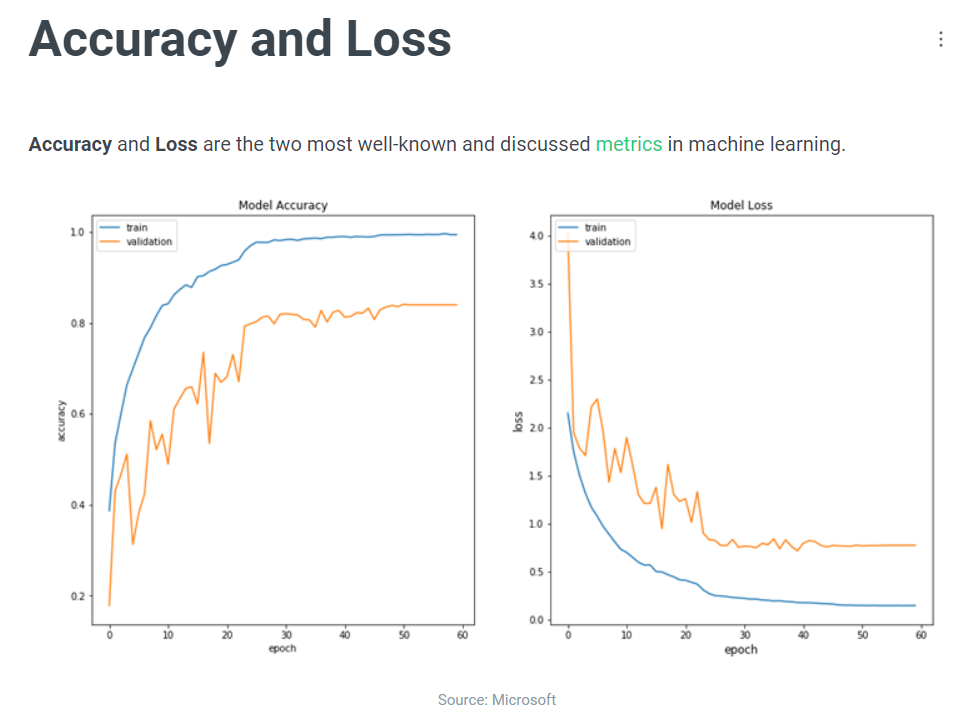

In [2]:
import pandas as pd
df = pd.read_csv('../모두의 딥러닝/data/iris3.csv')

In [3]:
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

In [4]:
y = pd.get_dummies(y)
print(y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True) 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim = 4, activation = 'relu'))  
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation = 'softmax'))    
model.summary()

#모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath = '../data//model/practice/Q0814_iris.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, verbose = 1)

history = model.fit(X_train, y_train, epochs = 50, batch_size = 500, validation_split = 0.25, verbose = 0, callbacks = [checkpointer])
#loss: 훈련 데이터에 대한 손실값
#val_loss: 검증 데이터에 대한 손실값
#accuracy: 훈련 데이터에 대한 정확도
#val_accuracy: 검증 데이터에 대한 정확도


Epoch 1: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 2: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 3: saving model to ../data//model/practice\Q0814_iris.hdf5


c:\Users\lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 5: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 6: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 7: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 8: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 9: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 10: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 11: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 12: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 13: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 14: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 15: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 16: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 17: saving model to ../data//model/practice\Q0814_iris.hdf5

Epoch 18: saving model to ../data//model/practice\Q0814_iris.hdf5



In [8]:
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split = 0.25)
hist_df = pd.DataFrame(history.history)

Epoch 1/2000
1/1 [==============================] - 0s 129ms/step - loss: 0.8951 - accuracy: 0.3667 - val_loss: 0.9730 - val_accuracy: 0.2667
Epoch 2/2000
1/1 [==============================] - 0s 64ms/step - loss: 0.8902 - accuracy: 0.3667 - val_loss: 0.9687 - val_accuracy: 0.2667
Epoch 3/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.8853 - accuracy: 0.3667 - val_loss: 0.9643 - val_accuracy: 0.2667
Epoch 4/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.8806 - accuracy: 0.3667 - val_loss: 0.9600 - val_accuracy: 0.2667
Epoch 5/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.8762 - accuracy: 0.3667 - val_loss: 0.9558 - val_accuracy: 0.2667
Epoch 6/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.8719 - accuracy: 0.3667 - val_loss: 0.9517 - val_accuracy: 0.2667
Epoch 7/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.8677 - accuracy: 0.3667 - val_loss: 0.9475 - val_accuracy: 0.2667
Epoch 8/2000

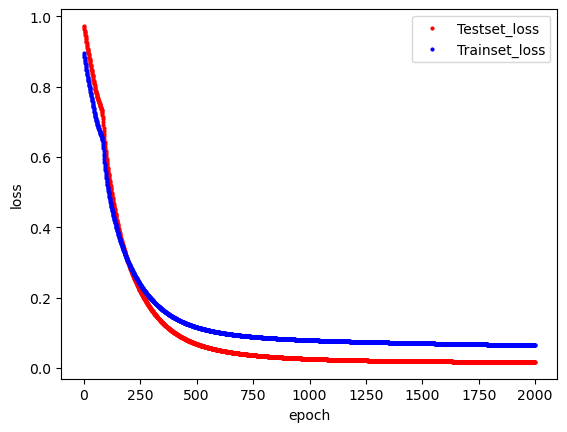

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# y_vloss에 테스트셋(여기서는 검증셋) 의 오차를 저장
y_vloss = hist_df['val_loss']
#y_loss에 학습셋의 오차를 저장
y_loss = hist_df['loss']
# x값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize = 2, label = 'Testset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize = 2, label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단될지 설정합니다.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)        #20번까지 찾고 향상되지 않으면 학습을 종료.

# 모델 실행
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split = 0.25, verbose = 1, callbacks = [early_stopping_callback, checkpointer])

Epoch 1/2000
1/1 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9778
Epoch 1: saving model to ../data//model/practice\Q0814_iris.hdf5
1/1 [==============================] - 0s 167ms/step - loss: 0.0646 - accuracy: 0.9778 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 2/2000
1/1 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9778
Epoch 2: saving model to ../data//model/practice\Q0814_iris.hdf5
1/1 [==============================] - 0s 90ms/step - loss: 0.0646 - accuracy: 0.9778 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 3/2000
1/1 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9778

c:\Users\lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to ../data//model/practice\Q0814_iris.hdf5
1/1 [==============================] - 0s 100ms/step - loss: 0.0646 - accuracy: 0.9778 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 4/2000
1/1 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9778
Epoch 4: saving model to ../data//model/practice\Q0814_iris.hdf5
1/1 [==============================] - 0s 79ms/step - loss: 0.0646 - accuracy: 0.9778 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 5/2000
1/1 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9778
Epoch 5: saving model to ../data//model/practice\Q0814_iris.hdf5
1/1 [==============================] - 0s 80ms/step - loss: 0.0646 - accuracy: 0.9778 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 6/2000
1/1 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9778
Epoch 6: saving model to ../data//model/practice\Q0814_iris.hdf5
1/1 [==============================] - 0s 94ms/step - loss: 0.0646 - acc

In [11]:
import numpy as np
iris1 = [[5.3, 2.4, 1, 1.3]]
iris2 = [[7,2.8,5.6,2]]

print(np.round(model.predict(iris1)))
print(np.round(model.predict(iris2)))
print(np.round(model.predict(iris2)))



1/1 [==============================] - 0s 245ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 79ms/step
[[0. 0. 1.]]
1/1 [==============================] - 0s 81ms/step
[[0. 0. 1.]]


In [16]:
np.round(model.predict(iris2))

1/1 [==============================] - 0s 67ms/step


array([[0., 0., 1.]], dtype=float32)